In [1]:
import numpy as np
import pandas as pd
from scipy import spatial
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

## Lennard-Jones

Use proper vectors (r is a vector as function arguments and force should have direction)

$$ V(r) = 4 \varepsilon \left[\left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right] $$

$r^{-12}$ term is repulsion due to Pauli Exclusion Principle and $r^{-6}$ term is attraction due to dipole-dipole interaction (van der Waals) between non-polar atoms.

$V(\sigma)=0$. and $V(2^{1/6} \sigma) = V_\text{min} = -\varepsilon$

$$ F(r) = -\nabla V = \frac{24 \varepsilon}{\sigma} \left[2 \left(\frac{\sigma}{r} \right)^{13} - \left( \frac{\sigma}{r} \right)^{7} \right] $$

For Argon the values are

- $m = 6.69 \times 10^{-26}$ kg
- $\varepsilon = 1.65 \times 10^{-21}$ J
- $\sigma = 3.4 \times 10^{-10}$ m

We'll choose all units as 1.0. $m = 1, \sigma=1, \varepsilon=1$. Which gives a time unit

$$\tau = \sqrt{\frac{m \sigma^2}{\varepsilon}} = 2.7 \times 10^{-12} \,\text{s}$$

This means a time duration $\Delta t = 1.0$ correspondes to 2.7 picoseconds in a simulation.

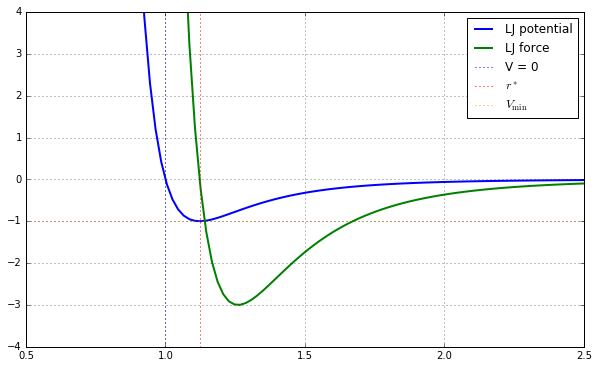

In [4]:
def lennard_jones_potential(r, epsion=1.0, sigma=1.0):
    sigma12 = np.power(sigma, 12.0) 
    sigma6 = np.power(sigma, 6.0)
    return 4.0 * epsion * (sigma12 * np.power(r, -12.) - sigma6 * np.power(r, -6.))

def lennard_jones_force(r, epsilon=1.0, sigma=1.0):
    sigma13 = np.power(sigma, 12.0) 
    sigma7 = np.power(sigma, 6.0)
    return 24.0 * epsilon / sigma * (2.0 * sigma13 * np.power(r, -12.) - sigma7 * np.power(r, -6.)) 

def plot_lj_pot(r, epsilon=1.0, sigma=1.0):
    pot = lennard_jones_potential(r, epsilon, sigma)
    plt.plot(r, pot, lw=2, label='LJ potential')

def plot_lj_force(r, epsilon=1.0, sigma=1.0):
    force = lennard_jones_force(r, epsilon, sigma)
    plt.plot(r, force, lw=2, label='LJ force')

r = np.linspace(0.5, 2.5, 100)
def plot_lj(epsilon=1.0, sigma=1.0):
    fig = plt.figure(figsize=(10, 6))
    plot_lj_pot(r, epsilon=epsilon, sigma=sigma)
    plot_lj_force(r, epsilon=epsilon, sigma=sigma)
    plt.ylim([-4.0, 4.0])
    plt.axvline(sigma, linestyle=':', color='blue', label='V = 0')
    plt.axvline(np.power(2.0, 1./6.) * sigma, linestyle=':', color='red', label='$r^*$')
    plt.axhline(-epsilon, linestyle=':', color='orange', label='$V_\mathrm{min}$')
    plt.legend()
    plt.title('')
    plt.grid()    
    
# plot_lj_pot(r, 1.0, 1.0)
interact(plot_lj, epsilon=(0.1, 2.0), sigma=(0.1, 2.0));